<a href="https://colab.research.google.com/github/PedroMSaraiva/OOP/blob/master/EnterpriseComposite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Padrão Estrutural Composite

Esses codigo é um exemplo do tipo estrutural composite. Irei seguir algumas partes o diagrama UML de classes a seguir:

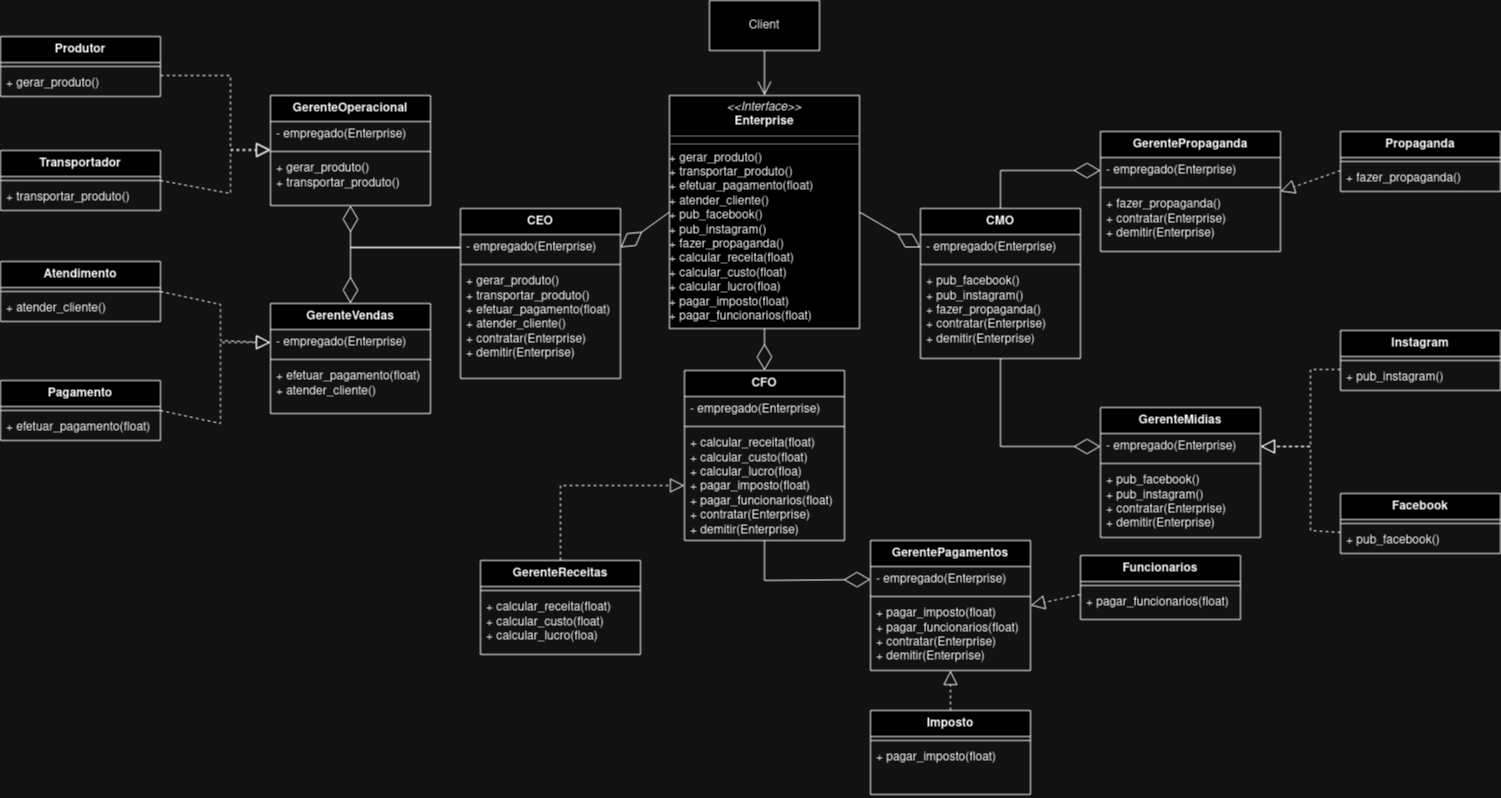

Isso esta disponivel no [gihub](https://github.com/PedroMSaraiva/OOP) também. Não seguirei o diagrama a risca, apenas vou mostrar o principais blocos de codigo


In [ ]:
from abc import ABC, abstractmethod
from typing import List

---
# Criação da Interface EnterpriseComponent

Serve como base o resto da arvore, root

In [ ]:
# Component
class EnterpriseComponent(ABC):
    @abstractmethod
    def gerar_produto(self):
        pass

    @abstractmethod
    def transportar_produto(self):
        pass

    @abstractmethod
    def efetuar_pagamento(self, valor: float):
        pass

    @abstractmethod
    def atender_cliente(self):
        pass


## Folha 1

Executa parte das atividades

In [ ]:
# Leaf
class Produto(EnterpriseComponent):
    def gerar_produto(self):
        print("Produto gerado.")

    def transportar_produto(self):
        pass  # Produto não implementa transportar_produto

    def efetuar_pagamento(self, valor: float):
        pass  # Produto não implementa efetuar_pagamento

    def atender_cliente(self):
        pass  # Produto não implementa atender_cliente

## Folha 2

Executa parte das atividades

In [ ]:
# Leaf
class Atendimento(EnterpriseComponent):
    def gerar_produto(self):
        pass  # Atendimento não implementa gerar_produto

    def transportar_produto(self):
        pass  # Atendimento não implementa transportar_produto

    def efetuar_pagamento(self, valor: float):
        pass  # Atendimento não implementa efetuar_pagamento

    def atender_cliente(self):
        print("Cliente atendido.")

## Folha 3

Executa parte das atividades

In [ ]:
# Leaf
class Pagamento(EnterpriseComponent):
    def gerar_produto(self):
        pass  # Pagamento não implementa gerar_produto

    def transportar_produto(self):
        pass  # Pagamento não implementa transportar_produto

    def efetuar_pagamento(self, valor: float):
        print(f"Pagamento efetuado: {valor}")

    def atender_cliente(self):
        pass  # Pagamento não implementa atender_cliente

---
## Criação do Composite

Ele passa as funções para as respectivas folhas, e retorna a "soma"

In [ ]:
# Composite
class GerenteOperacional(EnterpriseComponent):
    def __init__(self):
        self.children = []

    def add(self, component: EnterpriseComponent):
        self.children.append(component)

    def remove(self, component: EnterpriseComponent):
        self.children.remove(component)

    def gerar_produto(self):
        for child in self.children:
            child.gerar_produto()

    def transportar_produto(self):
        for child in self.children:
            child.transportar_produto()

    def efetuar_pagamento(self, valor: float):
        for child in self.children:
            child.efetuar_pagamento(valor)

    def atender_cliente(self):
        for child in self.children:
            child.atender_cliente()

---
função `main` para testar o codigo

In [ ]:
if __name__ == "__main__":
    # Criar objetos leaf
    produto = Produto()
    atendimento = Atendimento()
    pagamento = Pagamento()

    # Criar composite
    gerente_operacional = GerenteOperacional()

    # Adicionar leafs ao composite
    gerente_operacional.add(produto)
    gerente_operacional.add(atendimento)
    gerente_operacional.add(pagamento)

    # Executar métodos composite, que delegam para os leafs
    gerente_operacional.gerar_produto()
    gerente_operacional.atender_cliente()
    gerente_operacional.efetuar_pagamento(1000.0)
